In [26]:
import numpy as np
import pandas as pd
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

In [2]:
male = ['Srikanth','Raghu','Prasad','Srinivas','Praveen','Ram','Chaitanya','Sai','Shekar','Vinod','Kishore','Ali','Hussam']
female = ['Ramya','Rani','Asha','Veni','Malathi','Ranjitha','Bharathi','Amulya','Chandana','Spandana','Keerthi']

In [4]:
df_male=pd.DataFrame(male,columns=['names'])
df_female=pd.DataFrame(female,columns=['names'])

In [14]:
df_male['Label'] = 0
df_female['Label'] = 1
# concatenate
df = pd.concat((df_male,df_female),axis=0,ignore_index=True)
df.head()

Features
- Last Letter

In [24]:
def feature_last(name):
    return name[-1]

first = lambda x:x[0].lower()

In [28]:
df['Last'] = df['names'].apply(feature_last)
df['first'] = df['names'].apply(first)
df.head()

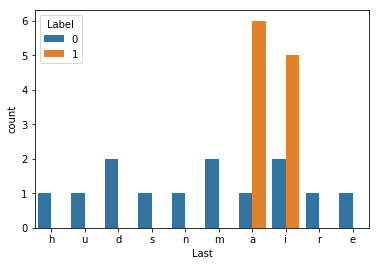

In [29]:
sns.countplot(x='Last',data =df,hue="Label")

In [33]:
# Creating dumming using one hot encoder
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [35]:
le = LabelEncoder()
ohe = OneHotEncoder()

In [55]:
labels = le.fit_transform(df['Last'])
onehot = ohe.fit_transform(labels.reshape(-1,1)).toarray()

In [58]:
with open('model/labelencoder.pkl','wb') as f:
    pickle.dump(le,f)
    
with open('model/onehotencoder.pkl','wb') as f:
    pickle.dump(ohe,f)

In [65]:
df_dummy = pd.DataFrame(onehot)
df_train = pd.concat((df_dummy,df['Label']),axis=1)
df_train.head()

,0,1,2,3,4,5,6,7,8,9,Label
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0
4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0


In [66]:
from sklearn.naive_bayes import MultinomialNB

In [67]:
model = MultinomialNB()

In [68]:
x = df_train.iloc[:,:-1].values
y = df_train.iloc[:,-1].values

In [70]:
model.fit(x,y)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [73]:
# test my model

In [83]:
def predict_gender(name):
    f = feature_last(name)
    # convert feature into factor (labelencoder)

    labelen = le.transform([f])

    # one hot encoder
    test = ohe.transform(labelen.reshape(-1,1)).toarray()
    test
    # pass test to my model
    out = model.predict(test)

    if out == 0:
        return 'Male'
    else:
        return 'Female'

In [85]:
predict_gender('srikanth')

'Male'

In [86]:
y_pred = model.predict(x)

In [87]:
from pandas_ml import ConfusionMatrix

In [92]:
cm = ConfusionMatrix(y,y_pred)
print(cm)
print(cm.classification_report)

Predicted  False  True  __all__
Actual                         
False         10     3       13
True           0    11       11
__all__       10    14       24
                precision    recall  F1_score support
Classes                                              
False                   1  0.769231  0.869565      13
True             0.785714         1      0.88      11
__avg / total__  0.901786     0.875  0.874348      24


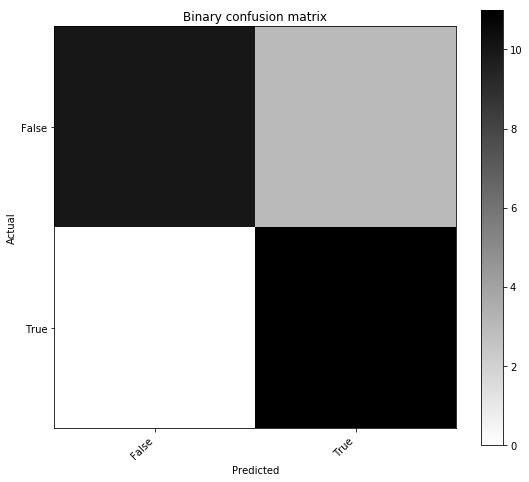

In [94]:
cm.plot()